In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:

# Load the dataset
df = pd.read_csv('../../data/Gold Price (2013-2023).csv')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
for col in ['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']:
    df[col] = df[col].str.replace(',', '')  # Remove commas
    df[col] = df[col].astype(str)  # Ensure all columns are string
    if col == 'Vol.':
        df[col] = df[col].str.replace('K', '').astype(float) * 1000  # Remove 'K' and multiply by 1000
    elif col == 'Change %':
        df[col] = df[col].str.replace('%', '').astype(float) / 100  # Remove percentage signs and convert to float
    else:
        df[col] = df[col].astype(float)  # Convert to float

print(df)

           Date   Price    Open     High      Low      Vol.  Change %
0    2022-12-30  1826.2  1821.8  1832.40  1819.80  107500.0    0.0001
1    2022-12-29  1826.0  1812.3  1827.30  1811.20  105990.0    0.0056
2    2022-12-28  1815.8  1822.4  1822.80  1804.20  118080.0   -0.0040
3    2022-12-27  1823.1  1808.2  1841.90  1808.00  159620.0    0.0074
4    2022-12-26  1809.7  1805.8  1811.95  1805.55       NaN    0.0030
...         ...     ...     ...      ...      ...       ...       ...
2578 2013-01-08  1663.2  1651.5  1662.60  1648.80     130.0    0.0097
2579 2013-01-07  1647.2  1657.3  1663.80  1645.30      90.0   -0.0016
2580 2013-01-04  1649.9  1664.4  1664.40  1630.00     310.0   -0.0153
2581 2013-01-03  1675.6  1688.0  1689.30  1664.30     190.0   -0.0085
2582 2013-01-02  1689.9  1675.8  1695.00  1672.10      60.0    0.0078

[2583 rows x 7 columns]


In [8]:

# Use only the 'Price' column for clustering (you can add more features)
X = df[['Price']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

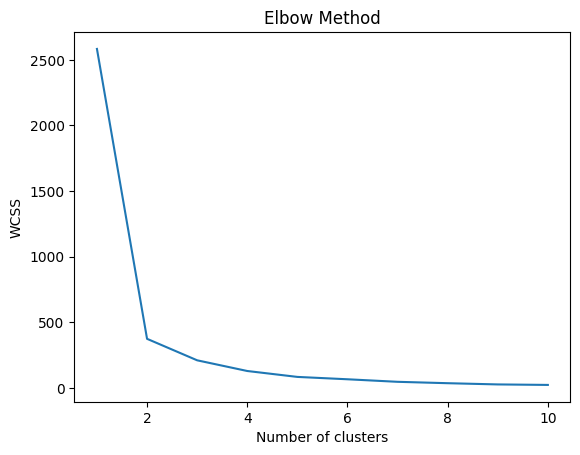

In [9]:

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

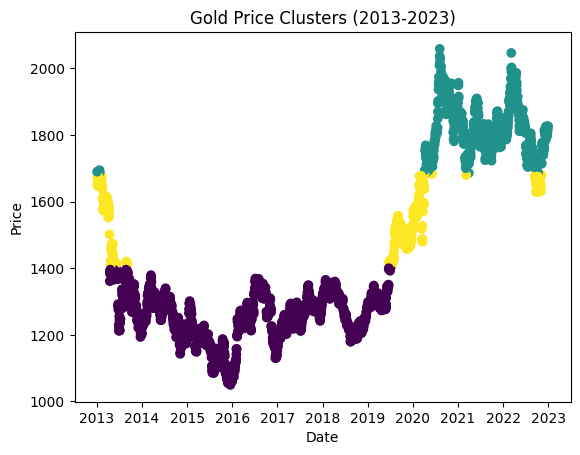

In [10]:

# Fit K-means with the optimal number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataframe
df['Cluster'] = clusters

# Visualize the clusters
plt.scatter(df['Date'], df['Price'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Price Clusters (2013-2023)')
plt.show()
